In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Identify companies symbols
symbols = ['AAPL', 'TSLA', 'MSFT', 'NVDA', 'GOOGL', 'AMZN', 'META', 'TSM', 'AVGO', 'TCEHY']

# Create a list to store data
combined_data = []

for symbol in symbols:
    # Pull company data
    stock = yf.Ticker(symbol)
    
    # Get the income statement
    income_statement = stock.financials.T
    
    if 'Net Income' in income_statement.columns:
        # Get annual net income data and add year information
        net_income = income_statement[['Net Income']].copy()
        net_income.loc[:, 'symbol'] = symbol  # Add column using loc func.
        net_income.loc[:, 'Year'] = net_income.index.year
        
        # Only keep data from 2020-2023
        net_income = net_income[net_income['Year'].between(2020, 2023)]
        
        # Add data to list
        combined_data.append(net_income)
    else:
        print(f"{symbol} No 'Net Income' .")

# Manually adding 2024 data
manual_data = {
    'AAPL': 100.389e9,
    'TSLA': 13.652e9,
    'MSFT': 86.181e9,
    'NVDA': 42.598e9,
    'GOOGL': 82.406e9,
    'AMZN': 37.684e9,
    'META': 45.758e9,
    'TSM': 28.177e9,
    'AVGO': 10.273e9,
    'TCEHY': 17.396e9
}

# Add 2024 data to DataFrame
manual_df = pd.DataFrame({
    'Net Income': [manual_data[symbol] for symbol in symbols],
    'symbol': symbols,
    'Year': [2024] * len(symbols)
})

# Add missing 2020 data
additional_data = [{'Net Income': 2796000000.0, 'symbol': 'NVDA', 'Year': 2020}]

additional_df = pd.DataFrame(additional_data)

# Combine all data
if combined_data:
    combined_df = pd.concat(combined_data, ignore_index=True)
    combined_df = pd.concat([combined_df, manual_df, additional_df], ignore_index=True)
    
    # convert to a CSV file
    csv_file_path = 'combined_annual_net_income.csv'
    combined_df.to_csv(csv_file_path, index=False)
    
    # Read CSV file and print first 10 rows
    earnings_data = pd.read_csv(csv_file_path)
    print(earnings_data.head(10))  
else:
    print("There is no valid data to merge.")



      Net Income symbol  Year
0   9.699500e+10   AAPL  2023
1   9.980300e+10   AAPL  2022
2   9.468000e+10   AAPL  2021
3   5.741100e+10   AAPL  2020
4   1.499900e+10   TSLA  2023
5   1.258300e+10   TSLA  2022
6   5.524000e+09   TSLA  2021
7   7.210000e+08   TSLA  2020
8   7.236100e+10   MSFT  2023
9   7.273800e+10   MSFT  2022
10  6.127100e+10   MSFT  2021
11  4.368000e+09   NVDA  2023
12  9.752000e+09   NVDA  2022
13  4.332000e+09   NVDA  2021
14  7.379500e+10  GOOGL  2023


In [3]:
#counting the numbers of rows and columns
earnings_data.shape


(50, 3)

In [5]:
# checking null values
null_check =  earnings_data.isnull().any()
print(null_check)

Net Income    False
symbol        False
Year          False
dtype: bool


In [7]:
# duplicate data in the dataset
earnings_data.duplicated().sum()

0

In [9]:
# type of columns in the dataset
earnings_data.dtypes

Net Income    float64
symbol         object
Year            int64
dtype: object

In [11]:
# changing the data type of columns in the dataset
earnings_data['Year'] = earnings_data['Year'].astype('int32')
earnings_data['symbol'] = earnings_data['symbol'].astype('category')
# Bilimsel gösterimi kapatma
pd.set_option('display.float_format', '{:,.0f}'.format)




In [39]:
# Identifying outliers with IQR
Q1 = earnings_data['Net Income'].quantile(0.25)
Q3 = earnings_data['Net Income'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers_iqr = earnings_data[(earnings_data['Net Income'] < lower_bound) | (earnings_data['Net Income'] > upper_bound)]
print("Outliers (IQR method):")
print(outliers_iqr)
#TSM company's data appeared to be an outlier, which may indicate that it has a higher net income compared to other companies, and TCEHY company also seems to have generated more income compared to other companies in 2021.


Outliers (IQR method):
        Net Income symbol  Year
26 851,740,000,000    TSM  2023
27 992,923,400,000    TSM  2022
28 592,359,200,000    TSM  2021
29 510,744,000,000    TSM  2020
36 224,822,000,000  TCEHY  2021


In [41]:

# Getting summary statistics for 'Net Income' column only
summary_stats = earnings_data['Net Income'].describe().T

print(summary_stats)
# A negative net income value indicates that either there is incorrect data or the company is making a loss. There should be  investigation into this. The difference between the standard deviation and the mean is high. There may be  skewness.

count                50
mean    105,071,552,000
std     201,987,436,387
min      -2,722,000,000
25%      13,759,500,000
50%      39,819,500,000
75%      85,237,250,000
max     992,923,400,000
Name: Net Income, dtype: float64


In [43]:
# Calculate skewness
skewness = earnings_data['Net Income'].skew()

# Print the skewness value
print(f"Skewness: {skewness}")

# Interpretation
if skewness > 0:
    print("The distribution is right skewed (positive skew).")
elif skewness < 0:
    print("The distribution is left skewed (negative skew).")
else:
    print("The distribution is symmetric.")

Skewness: 3.305188371127303
The distribution is right skewed (positive skew).


In [19]:
# Filtering out negative net income
negative_net_income = earnings_data[earnings_data['Net Income'] < 0]
print(negative_net_income)

#It looks like the 'Net Income' column only has one negative value

       Net Income symbol  Year
19 -2,722,000,000   AMZN  2022


In [21]:
#Checking the net income of Apple for other years
print(earnings_data[earnings_data['symbol'] == 'AMZN'])

       Net Income symbol  Year
18 30,425,000,000   AMZN  2023
19 -2,722,000,000   AMZN  2022
20 33,364,000,000   AMZN  2021
21 21,331,000,000   AMZN  2020
43 37,684,000,000   AMZN  2024


In [45]:
#How much did Apple's net income decrease in 2022 compared to 2021?
#Select the relevant net income
net_income_2021 =earnings_data.loc[(earnings_data['symbol'] == 'AMZN') & (earnings_data['Year'] == 2021), 'Net Income'].values[0]
net_income_2022 = earnings_data.loc[(earnings_data['symbol'] == 'AMZN') & (earnings_data['Year'] == 2022), 'Net Income'].values[0]

# Calculate the percentage change
percentage_change = ((net_income_2022 - net_income_2021) / abs(net_income_2021)) * 100

# Print the result
print(f"Percentage change in 2022 compared to 2021:{percentage_change:.2f}%")
#Apple's annual net revenue in 2022 is -$2.722 billion, a decrease of 108.16% compared to 2021.

Percentage change in 2022 compared to 2021:-108.16%


   symbol  Year      Net Income
0    AAPL  2020  57,411,000,000
1    AAPL  2021  94,680,000,000
2    AAPL  2022  99,803,000,000
3    AAPL  2023  96,995,000,000
4    AAPL  2024 100,389,000,000
5    AMZN  2020  21,331,000,000
6    AMZN  2021  33,364,000,000
7    AMZN  2022  -2,722,000,000
8    AMZN  2023  30,425,000,000
9    AMZN  2024  37,684,000,000
10   AVGO  2020   2,960,000,000
11   AVGO  2021   6,736,000,000
12   AVGO  2022  11,495,000,000
13   AVGO  2023  14,082,000,000
14   AVGO  2024  10,273,000,000
15  GOOGL  2020  40,269,000,000
16  GOOGL  2021  76,033,000,000
17  GOOGL  2022  59,972,000,000
18  GOOGL  2023  73,795,000,000
19  GOOGL  2024  82,406,000,000
20   META  2020  29,146,000,000
21   META  2021  39,370,000,000
22   META  2022  23,200,000,000
23   META  2023  39,098,000,000
24   META  2024  45,758,000,000
25   MSFT  2020  44,281,000,000
26   MSFT  2021  61,271,000,000
27   MSFT  2022  72,738,000,000
28   MSFT  2023  72,361,000,000
29   MSFT  2024  86,181,000,000
30   NVD

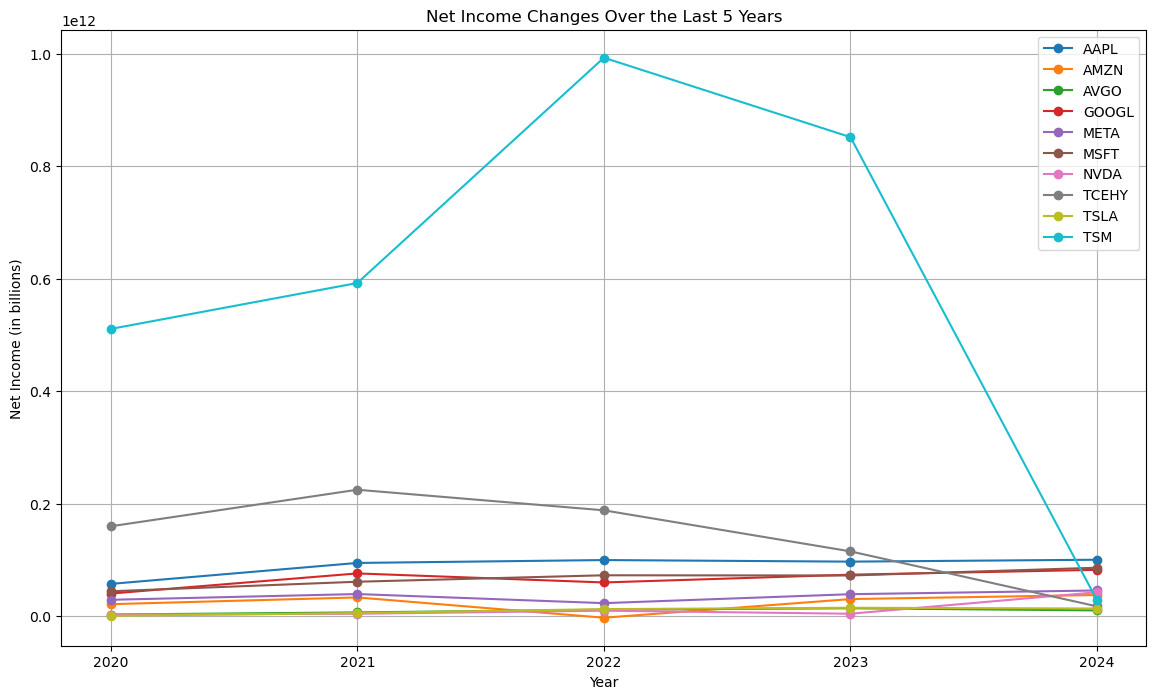

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

#Visualization of Net Income Changes of Apple company in Last 5 Years

# Grouping data and resetting the index
grouped_earnings_data = earnings_data.groupby(['symbol', 'Year'], observed=False).agg({'Net Income': 'sum'}).reset_index()

# Show grouped data
print(grouped_earnings_data)

# Visualization
plt.figure(figsize=(14, 8))
symbols = grouped_earnings_data['symbol'].unique()

for symbol in symbols:
    subset = grouped_earnings_data[grouped_earnings_data['symbol'] == symbol]
    plt.plot(subset['Year'], subset['Net Income'], marker='o', label=symbol)

plt.xlabel('Year')
plt.ylabel('Net Income (in billions)')
plt.title('Net Income Changes Over the Last 5 Years')
plt.legend()
plt.grid(True)
plt.xticks(grouped_earnings_data['Year'].unique())
plt.show()



In [47]:
#The percentage change in TSM's (Taiwan Semiconductor Manufacturing Company) net income in 2024 compared to 2020.
# Select the relevant net income
net_income_2020 =earnings_data.loc[(earnings_data['symbol'] == 'TSM') & (earnings_data['Year'] == 2020), 'Net Income'].values[0]
net_income_2024 = earnings_data.loc[(earnings_data['symbol'] == 'TSM') & (earnings_data['Year'] == 2024), 'Net Income'].values[0]

# Calculate the percentage change
percentage_change = ((net_income_2024 - net_income_2020) / abs(net_income_2020)) * 100

# Print the result
print(f"TSM (Taiwan Semiconductor Manufacturing Company) - percentage change in 2024 compared to 2020: {percentage_change:.2f}%")



TSM (Taiwan Semiconductor Manufacturing Company) - percentage change in 2024 compared to 2020: -94.48%


In [49]:
#The percentage change in TCEHY 's (Tencent Holdings) net income in 2024 compared to 2021.
# Select the relevant net income
net_income_2021 = earnings_data.loc[(earnings_data['symbol'] == 'TCEHY') & (earnings_data['Year'] == 2021), 'Net Income'].values[0]
net_income_2024 = earnings_data.loc[(earnings_data['symbol'] == 'TCEHY') & (earnings_data['Year'] == 2024), 'Net Income'].values[0]

# Calculate the percentage change
percentage_change = ((net_income_2024 - net_income_2021) / abs(net_income_2021)) * 100

# Print the result
print(f"TCEHY (Tencent Holdings) - percentage change in 2024 compared to 2021: {percentage_change:.2f}%")


TCEHY (Tencent Holdings) -- percentage change in 2024 compared to 2021: -92.26%


In [51]:
#The percentage change in  NVDA 's (NVIDIA) net income in 2024 compared to 2021.
# Select the relevant net income
net_income_2020 =earnings_data.loc[(earnings_data['symbol'] == 'NVDA') & (earnings_data['Year'] == 2020), 'Net Income'].values[0]
net_income_2024 = earnings_data.loc[(earnings_data['symbol'] == 'NVDA') & (earnings_data['Year'] == 2024), 'Net Income'].values[0]

# Calculate the percentage change
percentage_change = ((net_income_2024 - net_income_2020) / abs(net_income_2020)) * 100

# Print the result
print(f" NVDA(NVIDIA) -percentage change in 2024 compared to 2020: {percentage_change:.2f}%")  

 NVDA(NVIDIA) -percentage change in 2024 compared to 2020: 1423.53%


In [53]:
#The percentage change in AAPL 's (Apple)net income in 2024 compared to 2021.
# Select the relevant net income
net_income_2022 =earnings_data.loc[(earnings_data['symbol'] == 'AAPL') & (earnings_data['Year'] == 2022), 'Net Income'].values[0]
net_income_2023 = earnings_data.loc[(earnings_data['symbol'] == 'AAPL') & (earnings_data['Year'] == 2023), 'Net Income'].values[0]

# Calculate the percentage change
percentage_change = ((net_income_2023 - net_income_2022) / abs(net_income_2022)) * 100

# Print the result
print(f" AAPL(Apple) -percentage change in 2023 compared to 2022: {percentage_change:.2f}%")

 AAPL(Apple) -percentage change in 2023 compared to 2022: -2.81%


In [37]:

### TSMC (Taiwan Semiconductor Manufacturing Company)
#TSMC was the company with the highest net income between 2020 and 2023. However, in 2024, there was a significant decline in net income. Compared to 2020, TSMC's net income in 2024 showed a decrease of approximately 94.5%. This indicates a severe deterioration in the company's financial performance.

### TCEHY (Tencent Holdings)
#TCEHY was the company with the second highest net income in 2020 and 2021. However, after 2021, there was a substantial decline in net income, and by 2024, it had decreased by 92.3% compared to 2020. This signifies a major setback in the company's financial performance.

### NVIDIA
#NVIDIA experienced a substantial increase in net income in 2024. Compared to 2020, there was a 1423.5% increase, highlighting NVIDIA's significant growth potential.

### Apple
#High Net Income: Apple consistently achieved high net incomes between 2020 and 2024, and it was the company with the highest net income in 2024.
#Financial Stability: Despite some annual declines in net income, Apple's overall financial situation remained stable. Notably, it maintained high income figures between 2020 and 2024. Although there was a 2.8% decrease in net income from 2022 to 2023, this can typically be attributed to market conditions or the company's temporary strategic decisions.
#Annual Fluctuations: A decline in net income was observed from 2022 to 2023. However, such fluctuations can result from various external factors or internal changes faced by the company.

###Conclusion
#Despite some annual fluctuations in net income, Apple can be considered a successful company due to its consistently high net income and financial stability. Being the company with the highest net income as of 2024 demonstrates Apple's strong financial performance and its ability to maintain a healthy financial position in the long term.